In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
# path selections
train_dir = 'dataset_xray_images/train'
validation_dir = 'dataset_xray_images/val'

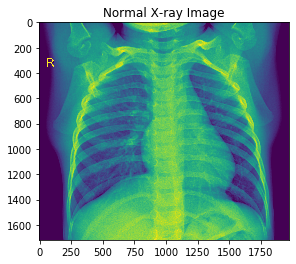

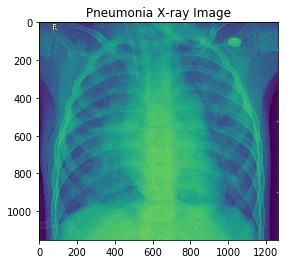

In [4]:
# looking into some of data from training set
img_path_norm = 'dataset_xray_images/train/NORMAL/IM-0166-0001.jpeg'
img = mpimg.imread(img_path_norm)
plt.title("Normal X-ray Image")
plt.imshow(img)
plt.show()

img_path_pneumonia = 'dataset_xray_images/train/PNEUMONIA/person12_bacteria_47.jpeg'
img = mpimg.imread(img_path_pneumonia)
plt.title("Pneumonia X-ray Image")
plt.imshow(img)
plt.show()

In [5]:
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2)

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    train_dir,
    target_size=(80,80),
    class_mode='categorical',
    batch_size=64
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(80,80),
    class_mode='categorical',
    batch_size=64
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [8]:
model = tf.keras.Sequential()

# first conv2d and maxpooling layer
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(80, 80, 3)))
model.add(layers.MaxPooling2D(2, 2))

# second conv2d and maxpooling layer
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

# third conv2d and maxpooling layer
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

# fourth conv2d and maxpooling layer
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

# flattening the layer and adding droupout of 20%
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))

# adding dense layer
model.add(layers.Dense(512, activation='relu'))

# adding dense layer
model.add(layers.Dense(264, activation='relu'))

# As binary classification hence 2 output layer
model.add(layers.Dense(2, activation='softmax'))


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 78, 78, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 39, 39, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 128)        

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(train_generator, epochs=45, validation_data = validation_generator, verbose = 1)

Epoch 1/45
82/82 [==============================] - 170s 2s/step - loss: 0.5955 - accuracy: 0.7347 - val_loss: 0.6399 - val_accuracy: 0.6330
Epoch 2/45
82/82 [==============================] - 130s 2s/step - loss: 0.4960 - accuracy: 0.7697 - val_loss: 0.5618 - val_accuracy: 0.6907
Epoch 3/45
82/82 [==============================] - 129s 2s/step - loss: 0.4008 - accuracy: 0.8108 - val_loss: 0.4986 - val_accuracy: 0.7676
Epoch 4/45
82/82 [==============================] - 129s 2s/step - loss: 0.3345 - accuracy: 0.8576 - val_loss: 0.4520 - val_accuracy: 0.7997
Epoch 5/45
82/82 [==============================] - 129s 2s/step - loss: 0.3062 - accuracy: 0.8669 - val_loss: 0.2841 - val_accuracy: 0.8846
Epoch 6/45
82/82 [==============================] - 130s 2s/step - loss: 0.2753 - accuracy: 0.8823 - val_loss: 0.2898 - val_accuracy: 0.8798
Epoch 7/45
82/82 [==============================] - 129s 2s/step - loss: 0.2431 - accuracy: 0.9009 - val_loss: 0.4156 - val_accuracy: 0.8638
Epoch 8/45
82

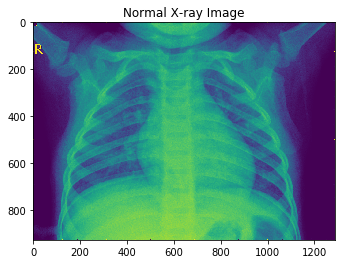

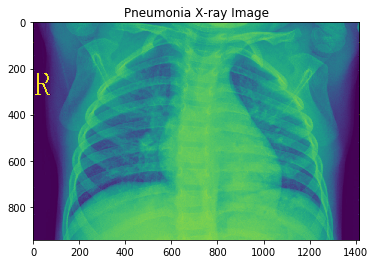

In [11]:
img_path_norm = 'dataset_xray_images/test/NORMAL/NORMAL2-IM-1436-0001.jpeg'
img = mpimg.imread(img_path_norm)
plt.title("Normal X-ray Image")
plt.imshow(img)
plt.show()

img_path_pneumonia = 'dataset_xray_images/test/PNEUMONIA/person1949_bacteria_4880.jpeg'
img = mpimg.imread(img_path_pneumonia)
plt.title("Pneumonia X-ray Image")
plt.imshow(img)
plt.show()

In [20]:
# taking testing image from test set
path_im_pneumonia = 'dataset_xray_images/test/PNEUMONIA/person1949_bacteria_4880.jpeg'
path_im_normal = 'dataset_xray_images/test/NORMAL/NORMAL2-IM-1436-0001.jpeg'

img1 = image.load_img(path_im_pneumonia, target_size=(80, 80))
img2 = image.load_img(path_im_normal, target_size=(80, 80))

# converting to array
imToArr1 = image.img_to_array(img1)
imToArr2 = image.img_to_array(img2)

# expanding layer
imToArr1 = np.expand_dims(imToArr1, axis=0)
imToArr2 = np.expand_dims(imToArr2, axis=0)

# stacking images
images = np.vstack([imToArr1,imToArr2])

#predicting
predicted_class = model.predict(images, batch_size=1)
print(predicted_class)

[[0. 1.]
 [1. 0.]]
